##### Author contributions
Please fill out for each of the following parts who contributed to what:
- Conceived ideas: 
- Performed math exercises: 
- Performed programming exercises:
- Contributed to the overall final assignment: 

# Chapter 8
## Hopfield networks

    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Brightspace before the deadline (see Brightspace).

Learning goals:
1. Get familiar with energy functions and with updating Hopfield networks by hand
1. Implement a Hopfield network that fulfills a constraint
1. Implement, train and test a Hopfield network on images

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import urllib
import skimage as ski
from random import randint

### Exercise 1: Flip-flop  (2 points)
Consider a Hopfield network consisting of two binary variables $x_1$ and $x_2$ with biases $\theta_1 = 0.5$ and $\theta_2 = 0.5$, and weights $w_{ij} = -1$. This network implements a so-called flip-flop. 
1. What is the energy function of this network? *(Write down the standard form of $E(\mathbf{x})$, insert the values and simplify it.)*
1. What are the possible energy levels of this network? *(Given the possible state combinations for $x_1$ and $x_2$ in a Hopfield network, which values can $E(\mathbf{x})$ have?)*
1. What are the stable states of this network?

### Solution 1
1. $$
\begin{align}
E(x) &= -\frac{1}{2}\sum_{i,j} w_{i,j}x_ix_j - \sum_{i}\theta_i x_i\\
&= -\frac{1}{2}(-1 * x_1 x_2 + -1x_2 x_1 ) - (0.5 x_1 + 0.5 x_2)\\
&= -\frac{1}{2}(-x_1x_2 - x_2x_1) - \frac{1}{2} (x_1 + x_2)\\
&= -\frac{1}{2}(-2x_1x_2) - \frac{1}{2} (x_1 + x_2)\\
&= x_1x_2 - \frac{1}{2} (x_1 + x_2)
\end{align}$$
2. 

if $\mathbf{x} = (0,0)$ then $ 0 * 0 - \frac{1}{2} (0 + 0) = 0 $ 

if $\mathbf{x} = (1,0)$ then $ 1 * 0 - \frac{1}{2} (1 + 0) = -\frac{1}{2} $

if $\mathbf{x} = (0,1)$ then $ 0 * 1 - \frac{1}{2} (0 + 1) = -\frac{1}{2} $

if $\mathbf{x} = (1,1)$ then $ 1 * 1 - \frac{1}{2} (1 + 1) = 0 $

3. Depending on the initial state of the nodes either active or not there are a few possibilities.
    * If $x_1$ and $x_2$ are both active then the stable state depends on the order of updating them but 1 of them will become inactive and that would be the end. 
    * If $x_1$ is active but $x_2$ is not active then they are already in stable state. Note that $x_1$ and $x_2$ can be changed since they are symetrical. 
    * Else if $x_1$ and $x_2$ are inactive at the start then one of them will become active and that would be the stable state. Again, which one depends on the order of updating and again, it does not really matter.

### Exercise 2: Hopfield net
Consider a Hopfield network with weights
\begin{equation}
\mathbf{W} =
\left[
\begin{array}{llll}
0 & -0.2 & -0.4 & 0\\
-0.2 & 0 & 0.5 & 0.3\\
-0.4 & 0.5 & 0 & 0.8\\
0 & 0.3 & 0.8 & 0
\end{array}
\right]
\end{equation}
and biases
$\boldsymbol{\theta} = (-0.5,-0.3,-0.8,0.2)$.
1. What is the state of the Hopfield network after one sequential update of the first, second, third and fourth node when we start at the initial node state $\mathbf{x} = (0,1,1,1)$? 
1. What do you conclude from your observation?

In [2]:
%load_ext tikzmagic

### Solution 2  (1 point)
1. $$\begin{align}
    x_1 &= (1 * (-0.2)) + (1 * 0) + (1 * (-0.4)) + (-0.5) = -0.9 &\text{0}\\
    x_2 &= (0 * (-0.2)) + (1 * 0.5) + (1 * 0.5) + (-0.3) = 0.7 &\text{1}\\
    x_3 &= (0 * (-0.4)) + (1 * 0.5) + (1 * 0.8) + 0.8 = 2.1 &\text{1}\\
    x_4 &= (0 * 0) + (1 * 0.5) + (1 * 0.8) + 0.2 = 1.5 &\text{1}
    \end{align}
$$ $\mathbf{x} = (0,1,1,1)$
1. It was already in a stable state.

### Exercise 3 : A Hopfield network that fulfills a constraint (2 points)

In this exercise you will run a Hopfield model that converges to a state that fulfills a constraint. 

1. Implement a function `optimize(n)` which returns a length `n` vector of node states. The constraint it should solve is that all nodes should be set to `0`, except for a single random node set to `1`.
1. Show that your function works for different values of `n`.

Start from random node states. Choose and implement the necessary weights and biases manually (i.e. you do not train the Hopfield network here). The resulting vector should be the configuration of the network when it has converged to a stable state. Make sure that your implementation fulfills all requirements for Hopfield networks to converge to stable states.

### Solution 3

In [3]:
# The optimization function
def check(n):
    check = 0 
    for i in range(n.shape[0]):
        check += n[i]
    return check == 1

def optimize(n):
    vec = np.zeros(n)
    index = randint(0,n-1)
    vec[index] = 1
    return vec

In [4]:
# Print solutions
for i in range(10,20,1):
    x = optimize(i)
    print("array {} result {}\n".format(x,check(x)))

array [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] result True

array [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] result True

array [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] result True

array [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] result True

array [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] result True

array [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] result True

array [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] result True

array [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] result True

array [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] result True

array [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] result True



### Training a Hopfield network on given patterns

You will now implement a Hopfield network that learns to reconstruct given images. Here you can *a) ignore the bias term*; and *b) use bipolar nodes*. 

The next cells load an image, resize it and store it together with a mirrored version of the same image in the variables `x1` and `x2`, which will be stacked in the training data `X`. These are your *input patterns*. 

In [5]:
# The source image
f = urllib.request.urlopen("https://homepages.cae.wisc.edu/~ece533/images/watch.png")

# Read the image
x1 = mpimg.imread(f)
x1 = ski.transform.resize(x1, (76, 102), mode="reflect", anti_aliasing=True)

# Make 2D and bipolar
x1 = np.mean(x1, axis=2)
x1[x1 < np.mean(x1.flatten())] = -1 # Black
x1[x1 >= np.mean(x1.flatten())] = 1 # White
x1.astype("int32")

# Make duplicate but mirrored second image
x2 = np.fliplr(x1)

# Flatten images
sz = x1.shape
X = np.stack((x1.flatten(), x2.flatten()), axis=1)

Text(0.5, 1.0, 'x2')

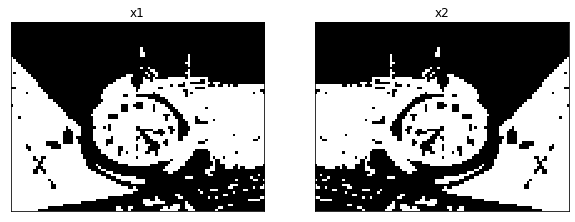

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(X[:, 0].reshape(sz), cmap="gray")
ax[0].set_xticks([], [])
ax[0].set_yticks([], [])
ax[0].set_title("x1")

ax[1].imshow(X[:, 1].reshape(sz), cmap="gray")
ax[1].set_xticks([], [])
ax[1].set_yticks([], [])
ax[1].set_title("x2")

### Exercise 4: Hopfield training  (1 point)
Write a function `hopfield_train(X)` which takes the $n$ *input patterns* `X` (shape $(m,n)$) as argument and returns the weight matrix `w` for a trained Hopfield network with $m$ nodes. Initialize the weights with zeros and then implement the learning rule for the weights. Again, make sure that your network fulfills the requirements for Hopfield network convergence. 

Note that you can write the weight update term per *input pattern* in a single line using the dot product. 

### Solution 4

In [7]:
# Hopfield training
def hopfield_train(X):
    m, n = X.shape

    # Initialize weights
    w = np.zeros([m,m])
    
    # Hebbian learning
    w = w + np.dot(X,X.transpose()) 
    
    # Avoid self-connections (diagonal)
    np.fill_diagonal(w,0)
    
    return w

### Exercise 5  (1 points)
Write a function `hopfield_test(X, w, n_epochs)` which takes the $n$ initial states `X` (shape $(m,n)$) and the learned weights `w` and updates all units in random order for `n_epochs` times (i.e., which "runs" your trained Hopfield network for `n_epochs` rounds). The return value should be the updated states of the Hopfield network. Make sure that your iteration fulfills the requirements for Hopfield network convergence.

### Solution 5

In [8]:
# Hopfield testing
def hopfield_test(X, w, n_epochs=10):
    Y = np.zeros([X.shape[0],X.shape[1]])
    # Loop over epochs
    ## Code here ##
    for epoch in range(n_epochs):
        # Loop over examples
        ## Code here ##
        for i in range(X.shape[1]):
            # Loop over nodes
            ## Code here ##
            for n in (np.random.permutation(X.shape[0])):
                # Update node
                ## Code here ##
                Y[n,i] = -1.0 if np.sum(np.where(X[:,i] == 1, 1, 0) * w[n,:]) < 0.0 else 1.0
    return Y

### Exercise 6  (1 points)
Train your hopfield network on the two *input patterns* in `X` and save the weights. 

### Solution 6

In [9]:
# Run hopfield training
w = hopfield_train(X)

### Exercise 7 (2 points)

Test whether your trained Hopfield net can reconstruct the original images when starting from different degrees of corruption (which means randomly changing the pattern's node states). Make use of the function `corrupt_images` for this. 

1. Choose 4 degrees of corruption (between min: 10%, max: 100%) you want to test. Corrupt the original input images in `X` accordingly.  
1. Run your trained Hopfield network with the corrupted images as input. It may not need to run for long time. 
1. For both patterns show the original, the corrupted and the reconstructed images next to each other. 
1. For each of the degrees of corruption, comment on what you see. 

In [10]:
def corrupt_images(X, percentage=25):
    Xhat = X.copy()
    n_pixels = int(X.shape[0] * percentage / 100)
    for i_example in range(X.shape[1]):
        idx = np.random.permutation(X.shape[0])[:n_pixels]
        Xhat[idx, i_example] = 2 * np.random.randint(0, 2, n_pixels) - 1
    return Xhat

### Solution 7

In [11]:
def plot_images(X,corX,RecX,percent):
    #Hard coded af.... (T_T)
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    ax[0][0].imshow(X[:,0].reshape(sz), cmap="gray")
    ax[0][0].set_title("original x1")
    ax[0][0].axis("off")
    ax[0][1].imshow(corX[:, 0].reshape(sz), cmap="gray")
    ax[0][1].set_title("corrupted x1 with {}%".format(percent))
    ax[0][1].axis("off")
    ax[0][2].imshow(recX[:,0].reshape(sz), cmap="gray")
    ax[0][2].set_title("reconstructed x1 with {}%".format(percent))
    ax[0][2].axis("off")
    
    ax[1][0].imshow(X[:,1].reshape(sz), cmap="gray")
    ax[1][0].set_title("original x2")
    ax[1][0].axis("off")
    ax[1][1].imshow(corX[:, 1].reshape(sz), cmap="gray")
    ax[1][1].set_title("corrupted x2 with {}%".format(percent))
    ax[1][1].axis("off")
    ax[1][2].imshow(recX[:,1].reshape(sz), cmap="gray")
    ax[1][2].set_title("reconstructed x2 with {}%".format(percent))
    ax[1][2].axis("off")
    plt.show()

NameError: name 'recX' is not defined

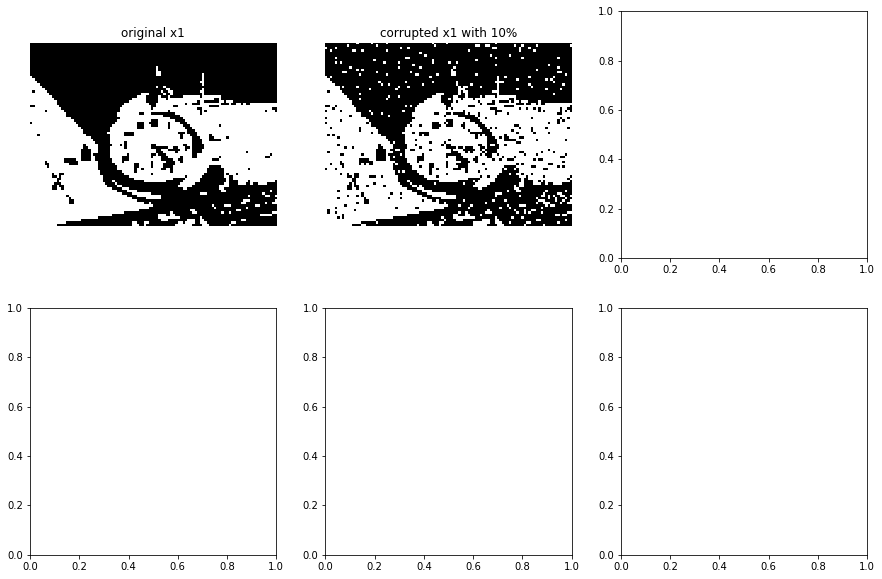

In [12]:
# Corrupt images
corX10 = corrupt_images(X,10)

# Test associative memory properties
recX10 = hopfield_test(corX10,w)

# Plot results
plot_images(X,corX10,recX10,10)

#### 10% 
At 10% corruption rate it reconstructed it "flawlessly". I did not formally check the distance between the 2 images ( _using similarity measure_ ) to confirm the flawless reconstruction but at least my eye can not spot a difference. 

In [ ]:
# Corrupt images
## Code here ##
corX37 = corrupt_images(X,37)

# Test associative memory properties
## Code here ##
recX37 = hopfield_test(corX37,w)

# Plot results
## Code here ##
plot_images(X,corX37,recX37,37)

#### 37%
It appears that going from 10% to 37% did not affect the overall result as the network again was able to reconstruct the image.  

In [ ]:
# Corrupt images
# Code here
corX77 = corrupt_images(X,77)

# Test associative memory properties
## Code here ##
recX77 = hopfield_test(corX77,w)

# Plot results
## Code here ##
plot_images(X,corX77,recX77,77)

#### 77%
Answer yet to come

In [ ]:
# Corrupt images
# Code here
corX99 = corrupt_images(X,99)

# Test associative memory properties
## Code here ##
recX99 = hopfield_test(corX99,w)

# Plot results
## Code here ##
plot_images(X,corX99,recX99,99)

Answer here.